In [1]:
#houseHomePage = 'https://rent.housefun.com.tw/region/台北市/?cid=0000'
#houseHomePage = 'https://rent.housefun.com.tw/region/新北市/?cid=0001'
#houseHomePage = 'https://rent.housefun.com.tw/region/新竹市/?cid=0006'
#houseHomePage = 'https://rent.housefun.com.tw/region/新竹縣/?cid=0007'
#houseHomePage = 'https://rent.housefun.com.tw/region/桃園市,基隆市/?cid=0008,0002&aid=,'

In [3]:
!pip install PyQt5

In [4]:
from bs4 import BeautifulSoup
import requests
import json
import pprint
import time
import re
import sqlite3
from datetime import datetime
import random
import sys
from PyQt5 import *
import selenium
import selenium.webdriver.support.ui as ui
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import os

In [5]:
def story(soup):
    try:
        title = soup.find('h2', {'class' : 'title'}).text
        itemDetial['標題'] = title
    except:
        itemDetial['標題'] = 'ERROR'

    try:
        rent = soup.find('span', {'class' : 'value'}).text
        itemDetial['租金'] = rent
    except:
        itemDetial['租金'] = 'ERROR'

    try:
        address = soup.find('address', {'class' : 'value addr'}).text.replace('租金行情','')
        itemDetial['地址'] = address
    except:
        itemDetial['地址'] = 'ERROR'

    try:
        area = soup.find_all('li',{'class':'list both'})[2].find('span',{'class','value'}).text
        itemDetial['坪數'] = area
    except:
        itemDetial['坪數'] = 'ERROR'

    try:
        deposit = soup.find_all('li',{'class':'list both'})[3].find('span',{'class','value'}).text
        itemDetial['押金'] = deposit
    except:
        itemDetial['押金'] = 'ERROR'

    try:
        otherFee = soup.find_all('li',{'class':'list both'})[4].find('span',{'class','value'}).text
        itemDetial['其他費用'] = otherFee
    except:
        itemDetial['其他費用'] = 'ERROR'

    try:
        floors = soup.find_all('li',{'class':'list both'})[5].find('span',{'class','value'}).text
        itemDetial['樓層'] = floors
    except:
        itemDetial['樓層'] = 'ERROR'

    try:
        pattern = soup.find_all('li',{'class':'list both'})[6].find('span',{'class','value'}).text
        itemDetial['格局'] = pattern
    except:
        itemDetial['格局'] = 'ERROR'

    try:
        use = soup.find_all('li',{'class':'list both'})[7].find('span',{'class','value'}).text
        itemDetial['用途'] = use
    except:
        itemDetial['用途'] = 'ERROR'

    try:
        typeOf = soup.find_all('li',{'class':'list both'})[8].find('span',{'class','value'}).text
        itemDetial['型態'] = typeOf
    except:
        itemDetial['型態'] = 'ERROR'

    try:
        checkIn = soup.find_all('li',{'class':'list both'})[9].find('span',{'class','value'}).text
        itemDetial['入住日期'] = checkIn
    except:
        itemDetial['入住日期'] = 'ERROR'

    try:
        telphone = soup.find_all('li',{'class':'telWrap'})[0].find('span',{'class':'tel'}).text.replace('\t','').replace('\n','').replace('請說您是在好房網看到的','')
        itemDetial['電話'] = telphone
    except:
        itemDetial['電話'] = 'ERROR'

    try:
        houseAge = soup.find_all('div',{'class':'TableWrap'})[0].find_all('td',{'class' : 'value'})[0].text
        itemDetial['屋齡'] = houseAge
    except:
        itemDetial['屋齡'] = 'ERROR'

    try:
        material = soup.find_all('div',{'class':'TableWrap'})[0].find_all('td',{'class' : 'value'})[1].text
        itemDetial['隔間材質'] = material
    except:
        itemDetial['隔間材質'] = 'ERROR'

    try:
        direction = soup.find_all('div',{'class':'TableWrap'})[0].find_all('td',{'class' : 'value'})[2].text
        itemDetial['朝向'] = direction
    except:
        itemDetial['朝向'] = 'ERROR'

    try:
        identifier = soup.find_all('div',{'class':'TableWrap'})[0].find_all('td',{'class' : 'value'})[3].text
        itemDetial['身份要求'] = identifier
    except:
        itemDetial['身份要求'] = 'ERROR'

    try:
        gender = soup.find_all('div',{'class':'TableWrap'})[0].find_all('td',{'class' : 'value'})[4].text
        itemDetial['性別限制'] = gender
    except:
        itemDetial['性別限制'] = 'ERROR'

    try:
        withHouse = soup.find_all('div',{'class':'TableWrap'})[0].find_all('td',{'class' : 'value'})[5].text
        itemDetial['與房東同住'] = withHouse
    except:
        itemDetial['與房東同住'] = 'ERROR'

    try:
        cook = soup.find_all('div',{'class':'TableWrap'})[0].find_all('td',{'class' : 'value'})[6].text
        itemDetial['開火'] = cook
    except:
        itemDetial['開火'] = 'ERROR'

    try:
        pet = soup.find_all('div',{'class':'TableWrap'})[0].find_all('td',{'class' : 'value'})[7].text
        itemDetial['寵物'] = pet
    except:
        itemDetial['寵物'] = 'ERROR'

    try:
        management = soup.find_all('div',{'class':'TableWrap'})[0].find_all('td',{'class' : 'value'})[8].text
        itemDetial['管理方式'] = management
    except:
        itemDetial['管理方式'] = 'ERROR'

    try:
        edge = soup.find_all('div',{'class':'TableWrap'})[0].find_all('td',{'class' : 'value'})[9].text
        itemDetial['邊間'] = edge
    except:
        itemDetial['邊間'] = 'ERROR'

    try:
        courtyard = soup.find_all('div',{'class':'TableWrap'})[0].find_all('td',{'class' : 'value'})[10].text
        itemDetial['中庭'] = courtyard
    except:
        itemDetial['中庭'] = 'ERROR'

    try:
        park = soup.find_all('div',{'class':'TableWrap'})[0].find_all('td',{'class' : 'value'})[11].text
        itemDetial['車位'] = park
    except:
        itemDetial['車位'] = 'ERROR'

    try:
        itemDetial['紀錄時間'] = str(datetime.now())
    except:
        itemDetial['紀錄時間'] = 'ERROR'

    try:
        equipment = soup.find_all('div',{'class':'TableWrap'})[0].find_all('tr')[4].find_all('span',{'class' : 'tableData has'})
        equi = ''
        if(len(equipment) != 0):
            for i in range(0, len(equipment)):
                equipment = soup.find_all('div',{'class':'TableWrap'})[0].find_all('tr')[4].find_all('span',{'class' : 'tableData has'})[i].text
                equi += equipment + ', '
        itemDetial['設備'] = equi 
    except:
        itemDetial['設備'] = 'ERROR'

    try:
        furniture = soup.find_all('div',{'class':'TableWrap'})[0].find_all('tr')[5].find_all('span',{'class' : 'tableData has'})
        furn = ''
        if(len(furniture) != 0):
            for i in range(0, len(furniture)):
                furniture = soup.find_all('div',{'class':'TableWrap'})[0].find_all('tr')[5].find_all('span',{'class' : 'tableData has'})[i].text
                furn += furniture + ', '
        itemDetial['家具'] = furn
    except:
        itemDetial['家具'] = 'ERROR'

    try:
        firement = soup.find_all('div',{'class':'TableWrap'})[0].find_all('tr')[6].find_all('span',{'class' : 'tableData has'})
        fire = ''
        if(len(firement) != 0):
            for i in range(0, len(firement)):
                firement = soup.find_all('div',{'class':'TableWrap'})[0].find_all('tr')[6].find_all('span',{'class' : 'tableData has'})[i].text
                fire += firement + ', '
        itemDetial['消防保全'] = fire
    except:
        itemDetial['消防保全'] = 'ERROR'

    try:
        publicEqu = soup.find_all('div',{'class':'TableWrap'})[0].find_all('tr')[7].find_all('span',{'class' : 'tableData has'})
        public = ''
        if(len(publicEqu) != 0):
            for i in range(0, len(publicEqu)):
                publicEqu = soup.find_all('div',{'class':'TableWrap'})[0].find_all('tr')[7].find_all('span',{'class' : 'tableData has'})[i].text
                public += publicEqu + ', '
        itemDetial['公共設施'] = public
    except:
        itemDetial['公共設施'] = 'ERROR'

    try:
        lifement = soup.find_all('div',{'class':'TableWrap'})[0].find_all('tr')[8].find_all('span',{'class' : 'tableData has'})
        life = ''
        if(len(lifement) != 0):
            for i in range(0, len(lifement)):
                lifement = soup.find_all('div',{'class':'TableWrap'})[0].find_all('tr')[8].find_all('span',{'class' : 'tableData has'})[i].text
                life += lifement + ', '
        itemDetial['生活機能'] = life
    except:
        itemDetial['生活機能'] = 'ERROR'

    try:
        traffic = soup.find_all('div',{'class':'TableWrap'})[0].find_all('tr')[9].find_all('td')[1]
        tra = ''
        if(len(traffic) != 0):
            for i in range(0, len(lifement)):
                traffic = soup.find_all('div',{'class':'TableWrap'})[0].find_all('tr')[9].find_all('td')[1].text.replace('\n','')
                tra += traffic + ', '
        itemDetial['附近交通'] = tra
    except:
        itemDetial['附近交通'] = 'ERROR'    

    try:
        community = soup.find_all('div',{'class':'TableWrap'})[0].find_all('tr')[10].find_all('td')[1]
        comm = ''
        if(len(community) != 0):
            for i in range(0, len(lifement)):
                community = soup.find_all('div',{'class':'TableWrap'})[0].find_all('tr')[10].find_all('td')[1].text.replace('\n','')
                comm += community + ', '
        itemDetial['所屬社區大樓'] = comm
    except:
        itemDetial['所屬社區大樓'] = 'ERROR'

    try:
        period = soup.find_all('div',{'class':'TableWrap'})[0].find_all('tr')[11].find_all('td')[1]
        per = ''
        if(len(period) != 0):
            for i in range(0, len(lifement)):
                period = soup.find_all('div',{'class':'TableWrap'})[0].find_all('tr')[11].find_all('td')[1].text.replace('\n','')
                per += period + ', '
        itemDetial['最短租期'] = per
    except:
        itemDetial['最短租期'] = 'ERROR'

    try:
        supplement = soup.find_all('div',{'class':'TableWrap'})[0].find_all('tr')[12].find_all('td')[1]
        supp = ''
        if(len(supplement) != 0):
            for i in range(0, len(lifement)):
                supplement = soup.find_all('div',{'class':'TableWrap'})[0].find_all('tr')[12].find_all('td')[1].text.replace('\n','')
                supp += period + ', '
        itemDetial['補充說明'] = supp
    except:
        itemDetial['補充說明'] = 'ERROR'
                        
    return itemDetial                

In [6]:
houseHomePage = 'https://rent.housefun.com.tw/region/台北市'
#HOST = 'https://rent.housefun.com.tw'

chrome_options = webdriver.ChromeOptions()
web = webdriver.Chrome()
web.get(houseHomePage)
#web.maximize_window()
#***********************************************************************************************************
#指定控制權到現在的頁面
main_handle = web.current_window_handle

#***********************************************************************************************************
#進入網頁後等待,跟sleep不同,條件是找到ID：SearchContent後,若超過10秒則TimeOutException
#http://selenium-python.readthedocs.io/waits.html
wait = ui.WebDriverWait(web, 15)
wait.until(EC.presence_of_element_located((By.ID, "SearchContent")))
wait.until(EC.presence_of_element_located((By.ID, "HouseCount")))
time.sleep(1)

soup = BeautifulSoup(web.page_source, 'lxml')
href = soup.select('#SearchContent > article > div > h3 > a')
pages = soup.find('span', {'id' : 'HouseCount'}).text
houseFun = {}
u = 0

for i in range(1, (int(pages)//10)+2):
#for i in range(1, 3):
    scroll = 0
    wait = ui.WebDriverWait(web, 15)
    wait.until(EC.presence_of_element_located((By.ID, "SearchContent")))
    wait.until(EC.presence_of_element_located((By.ID, "HouseCount")))
    time.sleep(1)
    soup = BeautifulSoup(web.page_source, 'lxml')
    href = soup.select('#SearchContent > article > div > h3 > a')
    
    for i in range(1, len(href)+1):
        itemDetial = {}

        try:
            #css的選擇器
            web.find_element_by_css_selector('#SearchContent > article:nth-child({}) > div.Data > h3 > a'.format(i)).click()
            st = random.uniform(1, 3)
            
            #指定控制權在所有的分頁
            all_handles = web.window_handles
            time.sleep(st) 
            #print('click')
            
            for handle in all_handles:
                #判斷控制權是否在（外網，這裡要切換到內網的控制權）
                if handle != main_handle:
                    st = random.uniform(1, 3)
                    time.sleep(st)
                    #print('sleep')
                    #切換控制權
                    web.switch_to_window(handle)
                    #print('switch')
                    #設定timeout時間
                    wait = ui.WebDriverWait(web, 15)
                    #print('wait')
                    #等到ID出來才繼續行動
                    wait.until(EC.presence_of_element_located((By.ID, "hidjsPersonalUrl")))
                    #print('until')
                    soup = BeautifulSoup(web.page_source, 'lxml')
                    #print('load')
                    
                    
                    web.execute_script("window.scrollTo(0, 180);")

                    try:
                        itemDetial['網址'] = web.current_url
                    except:
                        itemDetial[''] = '無資料'

                    story(soup)
                    
                    houseFun[u] = itemDetial
                    #print('end')
                    u += 1
                    
                    time.sleep(st)
                    web.close()
                    time.sleep(1)
                    web.switch_to_window(main_handle)
                    wait = ui.WebDriverWait(web, 15)
                    wait.until(EC.presence_of_element_located((By.ID, "SearchContent")))
                    #滾動滑鼠（起始位置，結束位置）
                    web.execute_script("window.scrollTo({}, {} + 150);".format(scroll, scroll))
                    scroll += 150
                    time.sleep(1)

        except Exception as e:
            #web.close()
            #houseFun[web.current_url]
            print(' Find Honey Can!!!  ,  ERROR : ' + str(e))
            web.switch_to_window(main_handle)
            #itemDeital['錯誤'] = str(e)
            web.execute_script("window.scrollTo({}, {} + 180);".format(scroll, scroll))
            scroll += 180
            time.sleep(1)
            
    time.sleep(1)        
    web.find_element_by_css_selector('#SearchContentDiv > div.m-pagination > ul > li:nth-child(13)').click()
        
        
with open('houseFunTaipei.json', 'w', encoding = 'UTF-8') as f:
    json.dump(houseFun, f, ensure_ascii=False)

WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home


In [4]:
with open('houseFunTaipei.json', 'w', encoding = 'UTF-8') as f:
    json.dump(houseFun, f, ensure_ascii=False)

In [6]:
pprint.pprint(houseFun)

{'https://rent.housefun.com.tw/rent/house/1006208/': {'中庭': '--',
                                                      '入住日期': '隨時',
                                                      '公共設施': '公用陽台, ',
                                                      '其他費用': '無',
                                                      '地址': '基隆市安樂區基金一路',
                                                      '坪數': '4,600 元 / 月',
                                                      '型態': '無電梯公寓',
                                                      '家具': '書桌, 椅子, 衣櫃, 單人床, '
                                                            '雙人床, ',
                                                      '寵物': '不可',
                                                      '屋齡': '30年',
                                                      '性別限制': '男女皆可',
                                                      '所屬社區大樓': '--, ',
                                                      '押金': '一個月租金',
                

                                                      '押金': '二個月租金',
                                                      '最短租期': '一年, ',
                                                      '朝向': '--',
                                                      '格局': '2房(室)1廳1衛',
                                                      '樓層': '9 / 11 樓',
                                                      '標題': '羅傑摩爾-獨立套房(樓上2房)/使用(9+7)坪(房屋編號：CC089545)',
                                                      '消防保全': '緩降梯, ',
                                                      '生活機能': '便利商店, 公園綠地, '
                                                              '學校, ',
                                                      '用途': '',
                                                      '租金': '7,000 元 / 月',
                                                      '管理方式': '管理員(警衛)',
                                                      '網址': 'https://rent.housefun.com.tw/rent/house/1089545/',
     

                                                      '型態': '電梯大樓',
                                                      '家具': '',
                                                      '寵物': '--',
                                                      '屋齡': '8.9年',
                                                      '性別限制': '--',
                                                      '所屬社區大樓': '--, ',
                                                      '押金': '二個月租金',
                                                      '最短租期': '--, ',
                                                      '朝向': '--',
                                                      '格局': '--房(室)2廳2衛',
                                                      '樓層': '1 / 7 樓',
                                                      '標題': '信義君悅旁店面租(房屋編號：0050533)',
                                                      '消防保全': '',
                                                      '生活機能': '傳統市場, ',
                    

                                                      '網址': 'https://rent.housefun.com.tw/rent/house/1248717/',
                                                      '與房東同住': '不用與房東同住',
                                                      '補充說明': '一年, ',
                                                      '設備': '',
                                                      '身份要求': '不限',
                                                      '車位': '有：昇降機械',
                                                      '邊間': '否',
                                                      '開火': '不可',
                                                      '附近交通': '近公車站：（103.104），步行約5分鐘近火車站：（基隆火車站），步行約10分鐘, ',
                                                      '隔間材質': '水泥',
                                                      '電話': '0906-201-095'},
 'https://rent.housefun.com.tw/rent/house/1248965/': {'中庭': '否',
                                                      '入住日期': '隨時',
                        

                                                      '家具': '',
                                                      '寵物': '--',
                                                      '屋齡': '--',
                                                      '性別限制': '男女皆可',
                                                      '所屬社區大樓': '--, ',
                                                      '押金': '二個月租金',
                                                      '最短租期': '兩年, ',
                                                      '朝向': '--',
                                                      '格局': '0房(室)0廳0衛',
                                                      '樓層': '1 / 5 樓',
                                                      '標題': '基隆廟口超級黃金金店面(房屋編號：CC262361)',
                                                      '消防保全': '',
                                                      '生活機能': '百貨公司, 便利商店, '
                                                              '傳統市場, 夜市, 公園綠地, '

                                                      '樓層': '33 樓',
                                                      '標題': '皇冠大樓(房屋編號：0068654)',
                                                      '消防保全': '',
                                                      '生活機能': '',
                                                      '用途': '',
                                                      '租金': '180,000 元 / 月',
                                                      '管理方式': '管理員(警衛)',
                                                      '網址': 'https://rent.housefun.com.tw/rent/house/1274056/',
                                                      '與房東同住': '--',
                                                      '補充說明': '',
                                                      '設備': '',
                                                      '身份要求': '--',
                                                      '車位': '無',
                                                      '邊間': 

                                                      '補充說明': '',
                                                      '設備': '熱水器, 天然瓦斯, 洗衣機, '
                                                            '瓦斯爐, 冰箱, ',
                                                      '身份要求': '--',
                                                      '車位': '有：坡道平面',
                                                      '邊間': '--',
                                                      '開火': '--',
                                                      '附近交通': ', ',
                                                      '隔間材質': '--',
                                                      '電話': '0910-077-307'},
 'https://rent.housefun.com.tw/rent/house/1284520/': {'中庭': '否',
                                                      '入住日期': '2017年07月01日',
                                                      '公共設施': '公用陽台, ',
                                                      '其他費用': '水費|電費|瓦斯費',
          

                                                      '所屬社區大樓': '--, ',
                                                      '押金': '二個月租金',
                                                      '最短租期': '一年, ',
                                                      '朝向': '坐南朝北',
                                                      '格局': '2房(室)2廳2衛',
                                                      '樓層': '2 / 4 樓',
                                                      '標題': '海洋大學學區-優質套房-(到祥豐校區步行九分鐘)(房屋編號：CC291217)',
                                                      '消防保全': '',
                                                      '生活機能': '便利商店, 傳統市場, '
                                                              '公園綠地, 學校, 醫療機構, '
                                                              '警察局, ',
                                                      '用途': '',
                                                      '租金': '4,200 元 / 月',
                                        

                                                           '電視, 冰箱, 冷氣, ',
                                                     '身份要求': '不限',
                                                     '車位': '--',
                                                     '邊間': '--',
                                                     '開火': '可',
                                                     '附近交通': ', ',
                                                     '隔間材質': '水泥',
                                                     '電話': '0928-511-2100928-51-1210'},
 'https://rent.housefun.com.tw/rent/house/841488/': {'中庭': '--',
                                                     '入住日期': '隨時',
                                                     '公共設施': '電梯, 公用陽台, ',
                                                     '其他費用': '管理費|水費|瓦斯費',
                                                     '地址': '基隆市安樂區基金一路',
                                                     '坪數': '4,000 元 / 月',
             

<!DOCTYPE html>
<!--[if lt IE 7]><html class="no-js IE" lang="en"><![endif]--><!--[if IE 7]><html class="no-js IE7" lang="en"><![endif]--><!--[if IE 8]><html class="no-js IE8" lang="en"><![endif]--><!--[if gt IE 8]><!--><html class=" smart js " dir="ltr" itemscope="" itemtype="http://schema.org/" lang="zh-Hant-TW" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:wb="http://open.weibo.com/wb"><!--<![endif]--><head><style type="text/css">.gm-style .gm-style-mtc label,.gm-style .gm-style-mtc div{font-weight:400}</style><link href="https://fonts.googleapis.com/css?family=Roboto:300,400,500,700" rel="stylesheet" type="text/css"/><style type="text/css">.gm-style .gm-style-cc span,.gm-style .gm-style-cc a,.gm-style .gm-style-mtc div{font-size:10px}</style><style type="text/css">@media print {  .gm-style .gmnoprint, .gmnoprint {    display:none  }}@media screen {  .gm-style .gmnoscreen, .gmnoscreen {    display:none  }}<
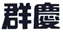

In [10]:
soup

In [5]:
web.quit()

In [6]:
type(houseFun)

dict

In [6]:
len(houseFun)

3237